--2025-09-03 12:38:40--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.198.1, 16.15.176.83, 52.216.178.211, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.198.1|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

replace /content/val2017/000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


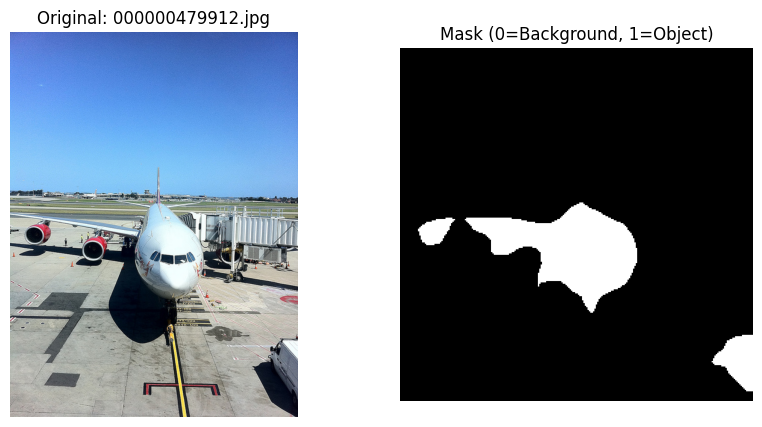

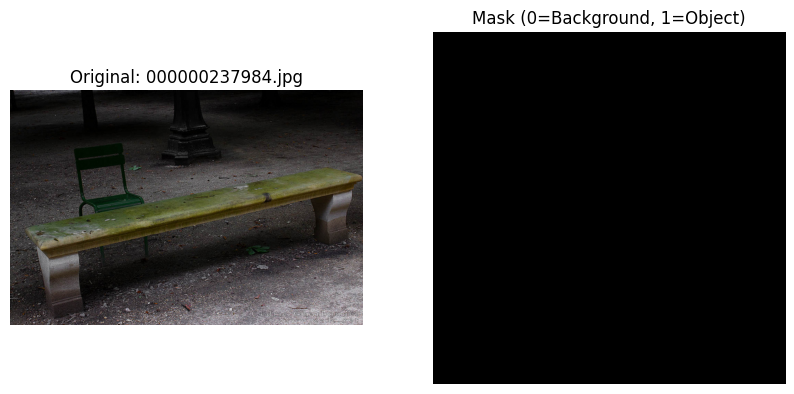

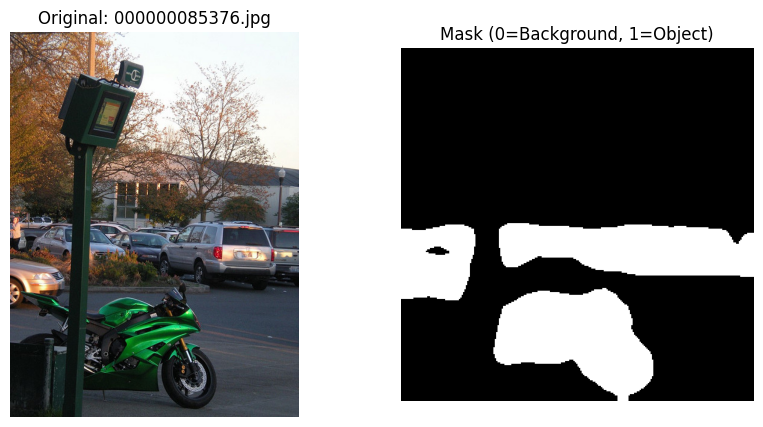

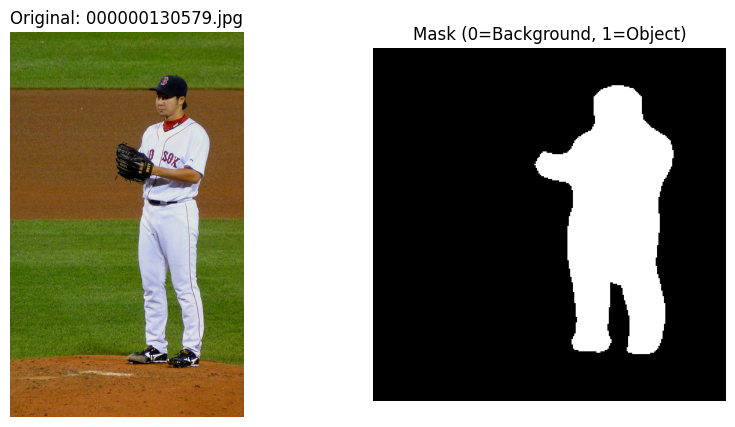

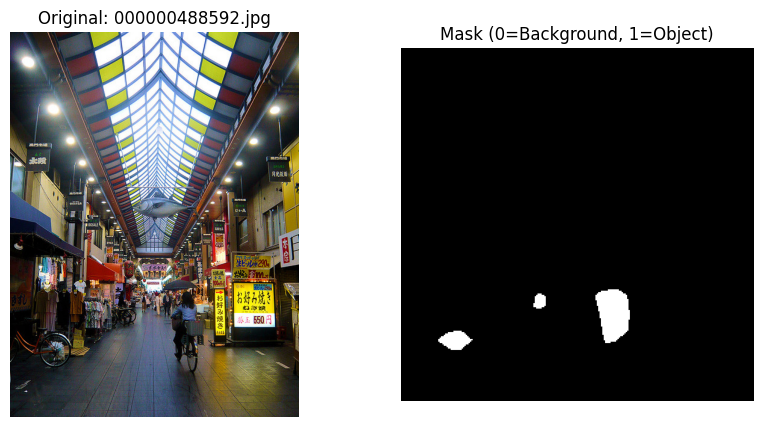

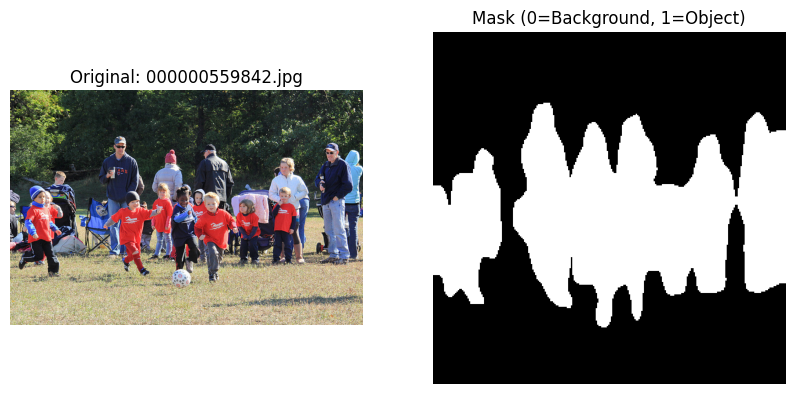

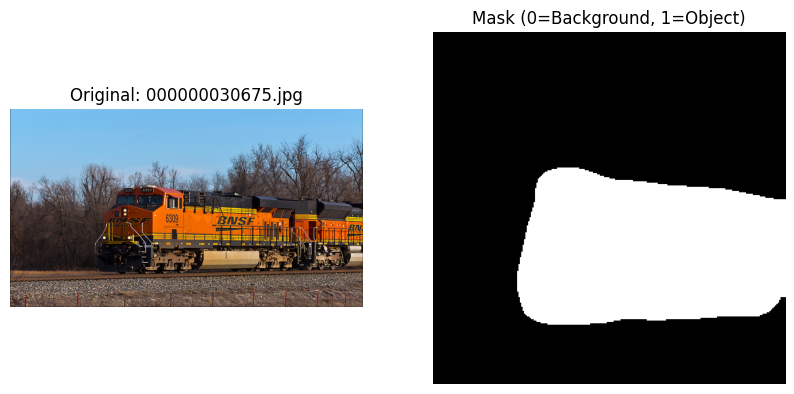

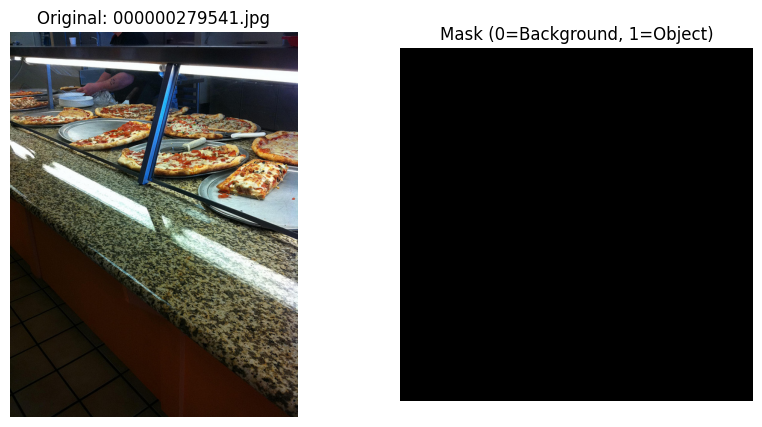

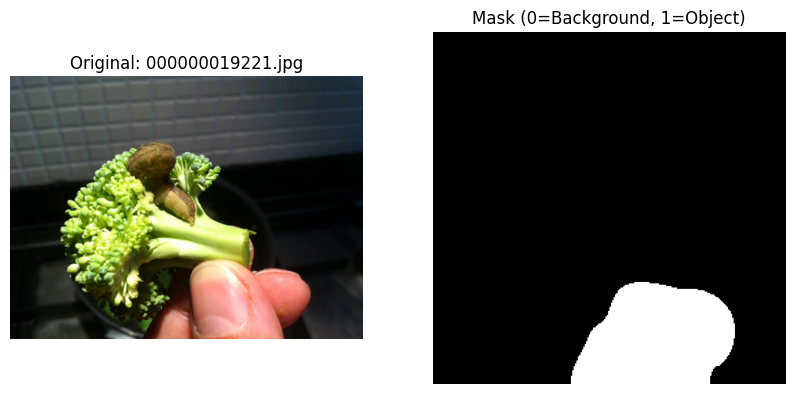

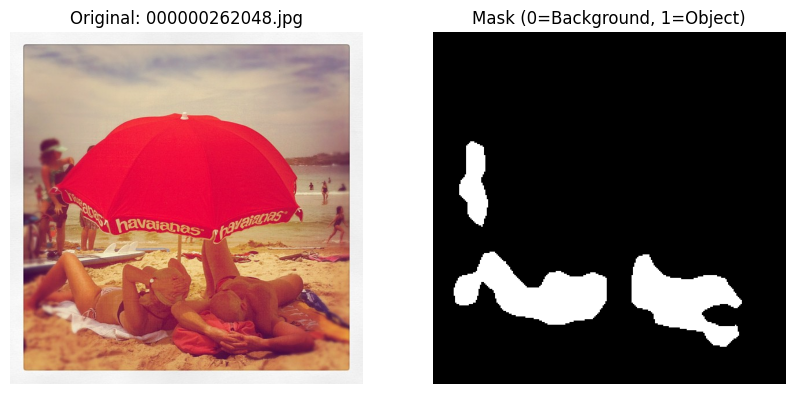

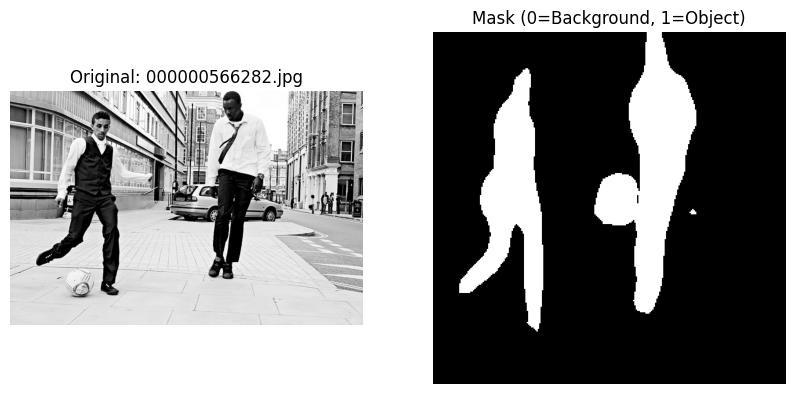

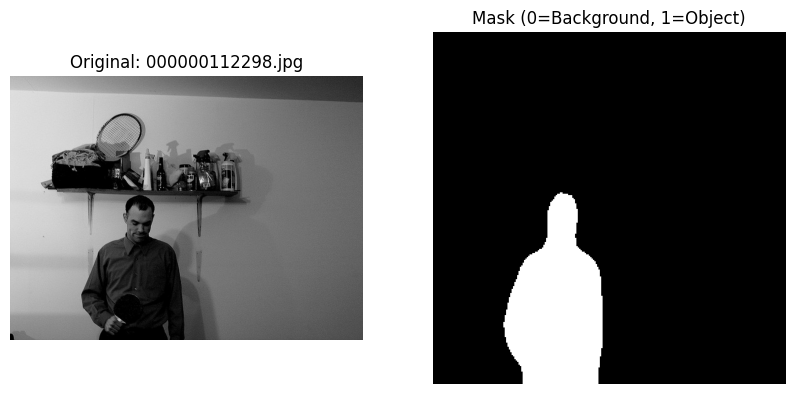

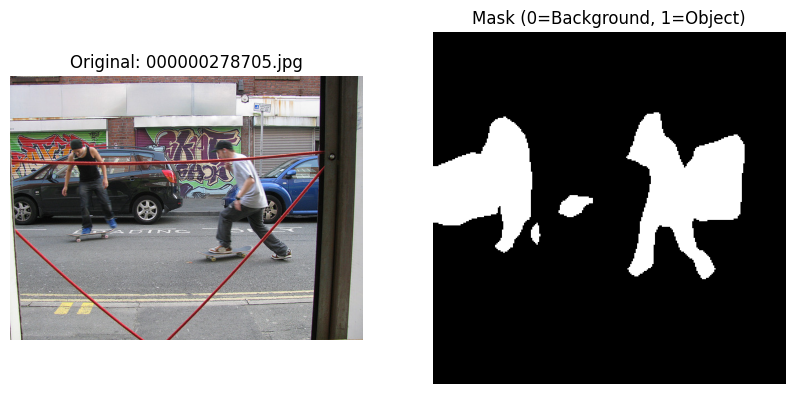

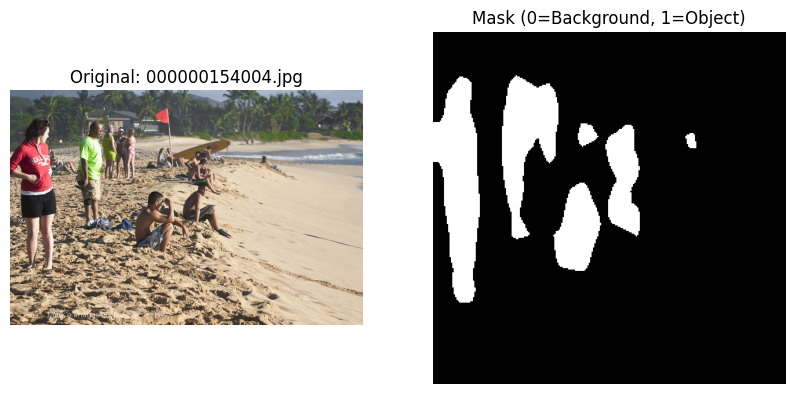

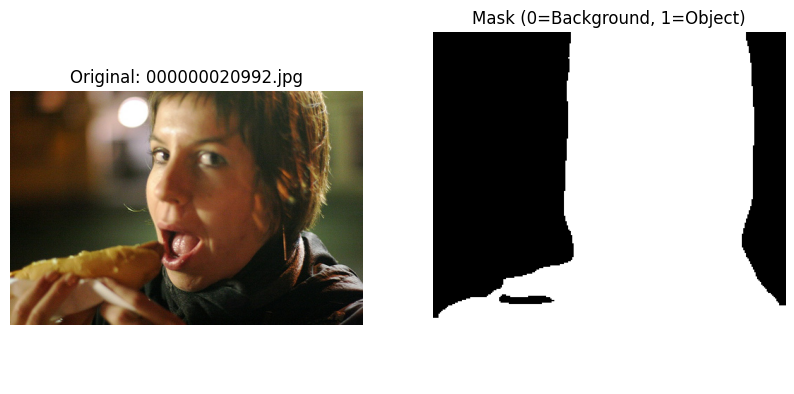

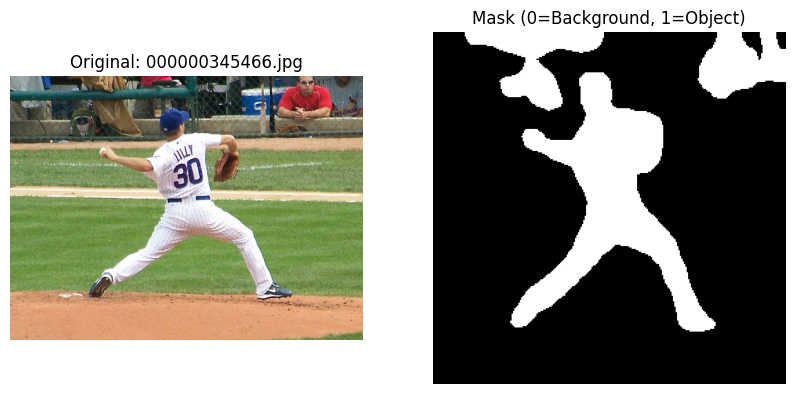

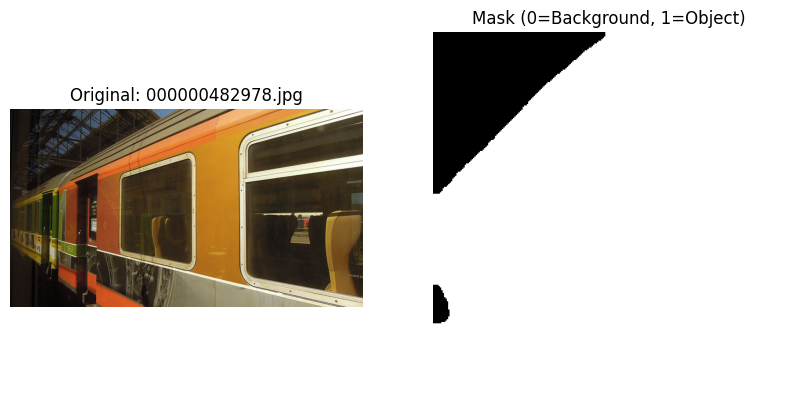

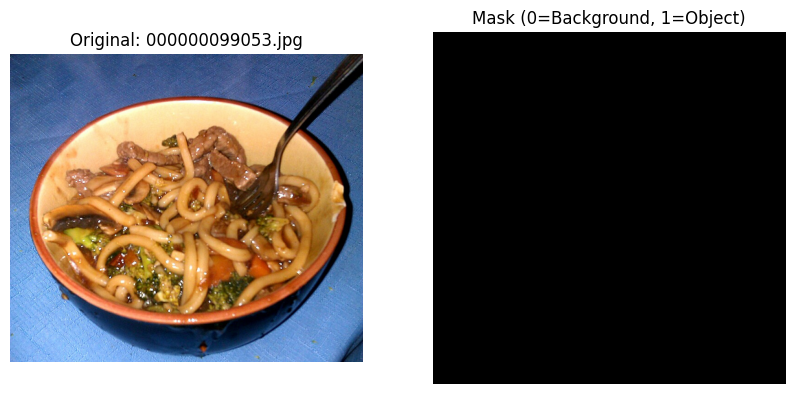

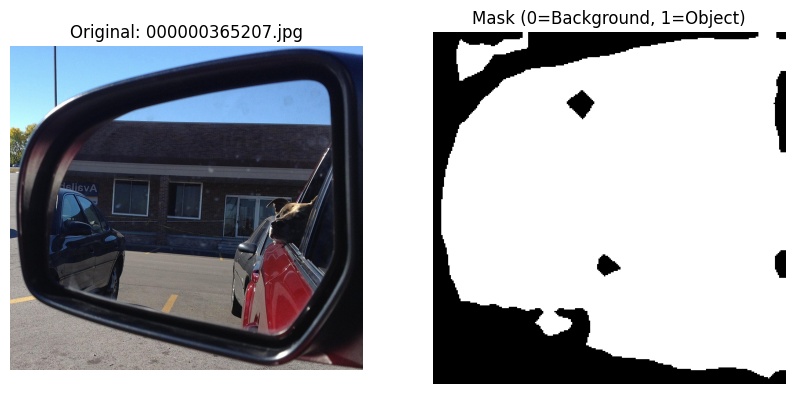

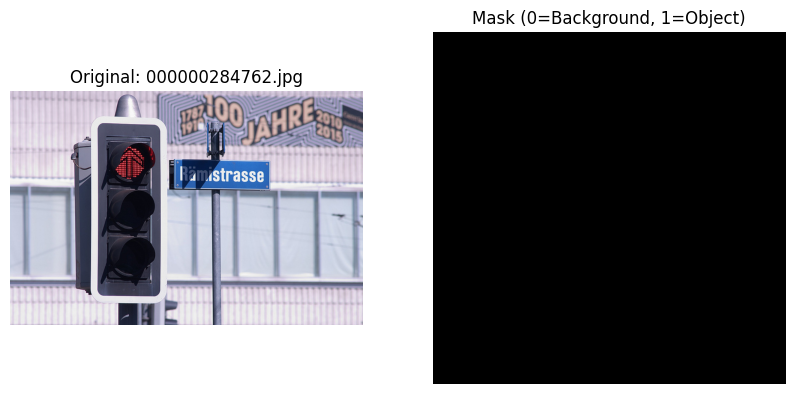

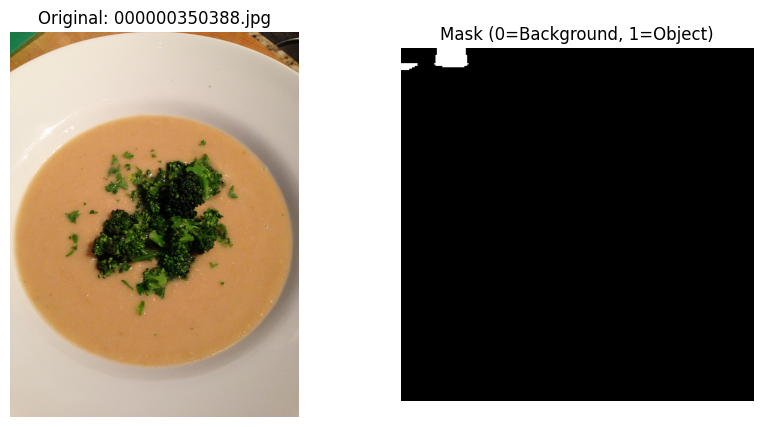

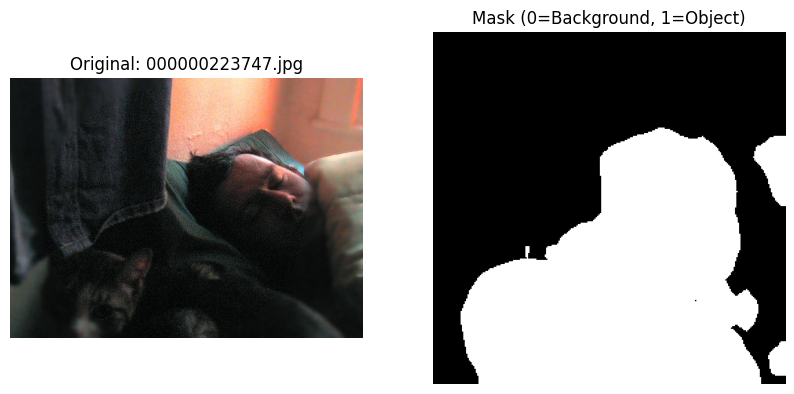

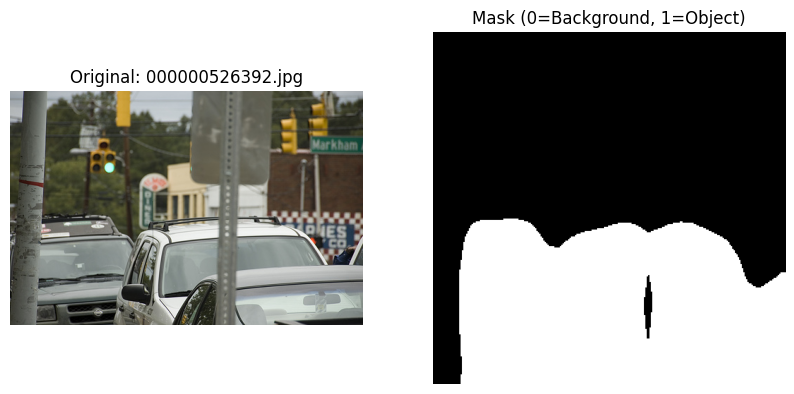

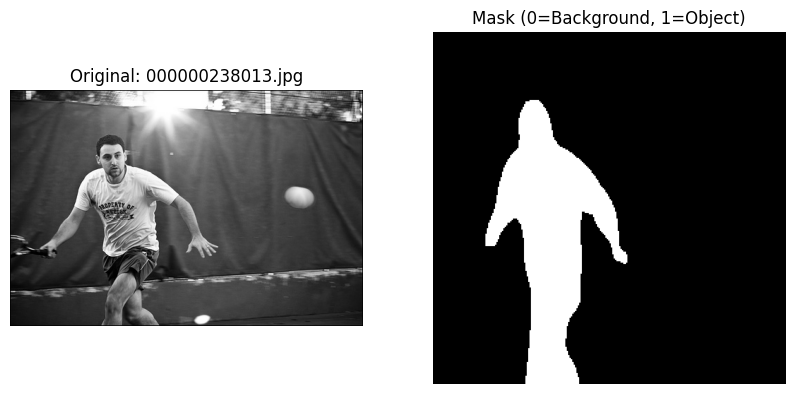

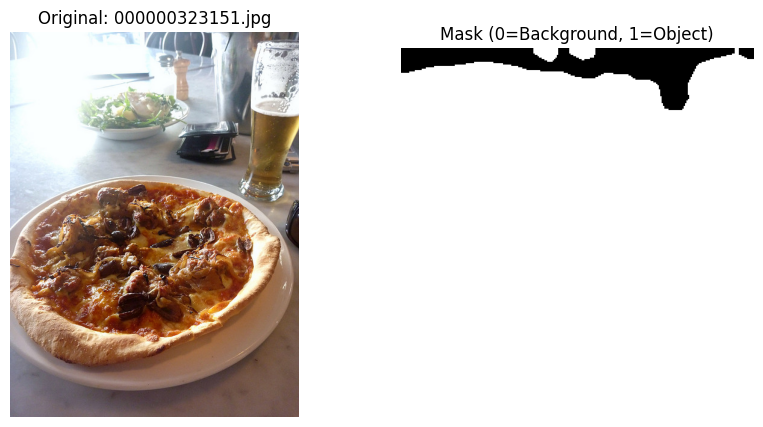

In [5]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob

!wget -c http://images.cocodataset.org/zips/val2017.zip
!unzip -q val2017.zip -d /content/

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True).to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

image_paths = glob.glob("/content/val2017/*.jpg")

for i, image_path in enumerate(image_paths[:25]):  # show first 10 images (change as needed)
    img_pil = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(img_pil).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)['out'][0]
        output_predictions = output.argmax(0).byte().cpu().numpy()

    mask = (output_predictions != 0).astype("uint8")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_pil)
    plt.title(f"Original: {os.path.basename(image_path)}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask (0=Background, 1=Object)")
    plt.axis("off")

    plt.show()
